<a href="https://colab.research.google.com/github/JOE1904/JOE1904/blob/main/Final_changes_Deep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <center><u> **Changes Made To the Model** </u>
### **Name: Joan Job <br> 21112037**

In [3]:
import shutil

# Function to delete the "logs" directory
def delete_logs_directory():
    try:
        shutil.rmtree("logs")
        print("The 'logs' directory has been deleted.")
    except FileNotFoundError:
        print("The 'logs' directory does not exist.")

# Call the function to delete the "logs" directory
delete_logs_directory()

The 'logs' directory does not exist.


In [4]:
import os
import datetime
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.callbacks import TensorBoard
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")
%load_ext tensorboard

## 1st Initial Change:  <br>
  - **Changed certain layers.**<br>
  - **The layers were changed from MaxPooling2D() to AveragePooling2D()**<br>
  - **There was also an existing layer of GlobalAveragePooling2D**

Enter the number of epochs: 15
Epoch 1/15
1563/1563 [==============================] - 13s 7ms/step - loss: 4.1952 - accuracy: 0.0500 - val_loss: 3.8388 - val_accuracy: 0.0896
Epoch 2/15
1563/1563 [==============================] - 10s 6ms/step - loss: 3.7357 - accuracy: 0.1126 - val_loss: 3.5395 - val_accuracy: 0.1437
Epoch 3/15
1563/1563 [==============================] - 10s 7ms/step - loss: 3.5071 - accuracy: 0.1548 - val_loss: 3.3196 - val_accuracy: 0.1928
Epoch 4/15
1563/1563 [==============================] - 10s 7ms/step - loss: 3.3383 - accuracy: 0.1860 - val_loss: 3.1524 - val_accuracy: 0.2223
Epoch 5/15
1563/1563 [==============================] - 9s 6ms/step - loss: 3.1988 - accuracy: 0.2120 - val_loss: 3.0547 - val_accuracy: 0.2457
Epoch 6/15
1563/1563 [==============================] - 10s 6ms/step - loss: 3.0820 - accuracy: 0.2393 - val_loss: 2.8922 - val_accuracy: 0.2804
Epoch 7/15
1563/1563 [==============================] - 10s 6ms/step - loss: 2.9887 - accuracy: 0.25

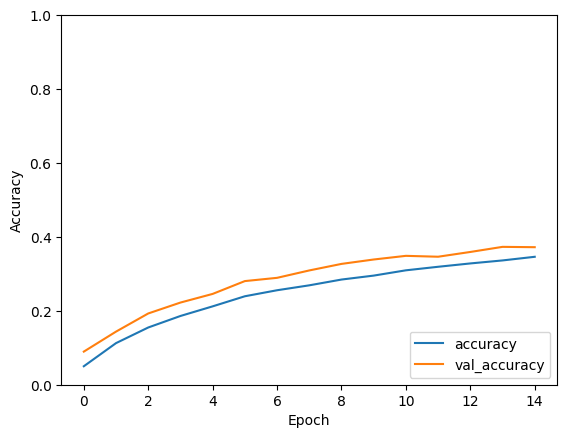

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 average_pooling2d_2 (Avera  (None, 16, 16, 32)        0         
 gePooling2D)                                                    
                                                                 
 dropout_12 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 average_pooling2d_3 (Avera  (None, 8, 8, 64)          0         
 gePooling2D)                                                    
                                                                 
 dropout_13 (Dropout)        (None, 8, 8, 64)         

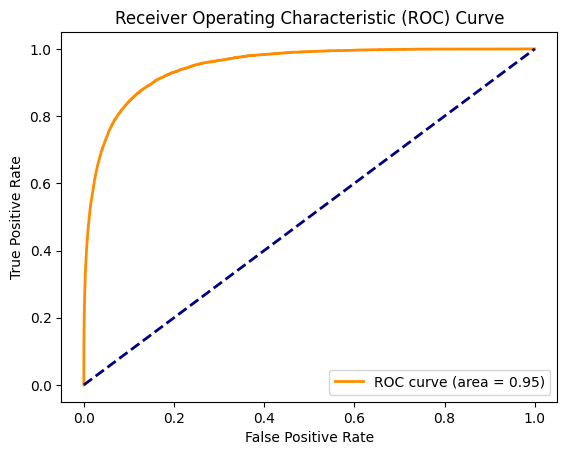

313/313 [==============================] - 1s 2ms/step
Confusion Matrix:
[[69  1  1 ...  0  0  0]
 [ 0 29  0 ...  1  0  1]
 [ 1  0 21 ...  0  6  0]
 ...
 [ 0  0  0 ... 36  0  0]
 [ 0  0  2 ...  3 20  1]
 [ 0  0  0 ...  1  0 26]]

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.69      0.64       100
           1       0.49      0.29      0.36       100
           2       0.33      0.21      0.26       100
           3       0.20      0.19      0.20       100
           4       0.15      0.26      0.19       100
           5       0.29      0.22      0.25       100
           6       0.49      0.40      0.44       100
           7       0.39      0.42      0.40       100
           8       0.43      0.29      0.35       100
           9       0.65      0.41      0.50       100
          10       0.34      0.13      0.19       100
          11       0.45      0.18      0.26       100
          12       0.38      0.46      0.41 

In [9]:

def load_cifar100():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='fine')
    x_train, x_test = x_train / 255.0, x_test / 255.0
    num_classes = 100
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)
    return x_train, y_train, x_test, y_test

def create_cnn_model(input_shape, num_classes):
    model = tf.keras.models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(layers.AveragePooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.AveragePooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    # model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    # model.add(layers.Dropout(0.25))

    model.add(layers.GlobalAveragePooling2D())

    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(num_classes, activation='softmax'))

    opt = tf.keras.optimizers.Adam(0.001)
    model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    logdir = os.path.join("logs", datetime.now().strftime("%Y%m%d-%H%M%S"))
    tensorboard_callback = TensorBoard(logdir, histogram_freq=1)

    return model, tensorboard_callback

def train_model(model, x_train, y_train, x_val, y_val, epochs, tensorboard_callback):
    history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_val, y_val), callbacks=[tensorboard_callback])
    # model.save_weights("model_weights.h5")
    return history

def evaluate_model(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    print(f'\nTest accuracy: {test_acc}')
    return test_acc

def plot_training_history(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.show()

def plot_model_architecture(model):
    model.summary()
    plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

def plot_roc_curve(model, x_test, y_test):
    y_pred = model.predict(x_test)
    fpr, tpr, thresholds = roc_curve(y_test.ravel(), y_pred.ravel())
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

def display_confusion_matrix_and_report(model, x_test, y_test):
    y_pred_probabilities = model.predict(x_test)
    y_pred_class = y_pred_probabilities.argmax(axis=1)
    y_true_class = y_test.argmax(axis=1)

    conf_matrix = confusion_matrix(y_true_class, y_pred_class)
    class_report = classification_report(y_true_class, y_pred_class)

    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)

def main():
    x_train, y_train, x_test, y_test = load_cifar100()
    input_shape = x_train.shape[1:]
    num_classes = 100

    model, tensorboard_callback = create_cnn_model(input_shape, num_classes)

    epochs = int(input("Enter the number of epochs: "))
    x_val, y_val = x_test, y_test  # Use test set for validation
    history = train_model(model, x_train, y_train, x_val, y_val, epochs, tensorboard_callback)

    evaluate_model(model, x_test, y_test)
    plot_training_history(history)
    plot_model_architecture(model)
    plot_roc_curve(model, x_test, y_test)
    display_confusion_matrix_and_report(model, x_test, y_test)

if __name__ == "__main__":
    main()

## 2nd Instance Change:  <br>
  - **Changed the optimizers from ADAM to SGD.**<br>
  - **Also changed the loss function from categorical cross entropy to sparse categorical cross entropy**<br>
  - **Changed activation functions of certain layers from relu to sigmoid or tanh.**

Enter the number of epochs: 15
Epoch 1/15
1563/1563 [==============================] - 13s 7ms/step - loss: 4.6128 - accuracy: 0.0103 - val_loss: 4.6081 - val_accuracy: 0.0100
Epoch 2/15
1563/1563 [==============================] - 12s 8ms/step - loss: 4.6091 - accuracy: 0.0100 - val_loss: 4.6082 - val_accuracy: 0.0100
Epoch 3/15
1563/1563 [==============================] - 16s 11ms/step - loss: 4.6080 - accuracy: 0.0097 - val_loss: 4.6070 - val_accuracy: 0.0100
Epoch 4/15
1563/1563 [==============================] - 10s 7ms/step - loss: 4.6072 - accuracy: 0.0105 - val_loss: 4.6069 - val_accuracy: 0.0107
Epoch 5/15
1563/1563 [==============================] - 10s 7ms/step - loss: 4.6068 - accuracy: 0.0095 - val_loss: 4.6067 - val_accuracy: 0.0100
Epoch 6/15
1563/1563 [==============================] - 9s 6ms/step - loss: 4.6065 - accuracy: 0.0101 - val_loss: 4.6061 - val_accuracy: 0.0100
Epoch 7/15
1563/1563 [==============================] - 10s 6ms/step - loss: 4.6063 - accuracy: 0.0

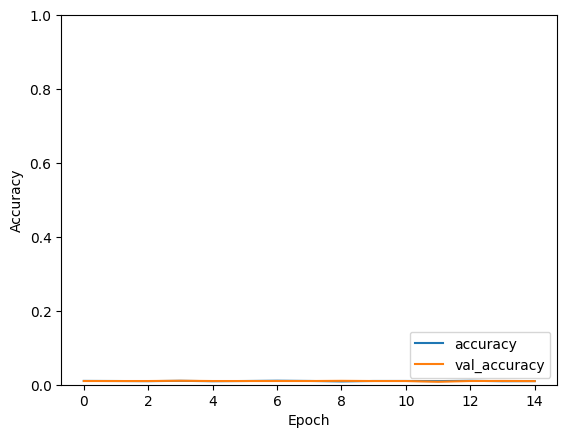

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 8, 8, 64)         

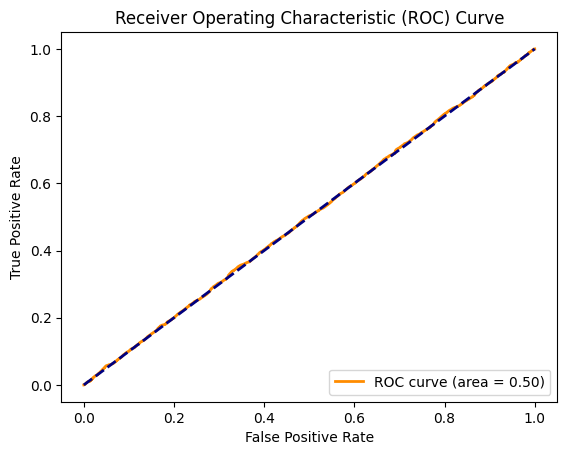

313/313 [==============================] - 1s 2ms/step
Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.00      0.00      0.00       100
           2       0.00      0.00      0.00       100
           3       0.00      0.00      0.00       100
           4       0.00      0.00      0.00       100
           5       0.00      0.00      0.00       100
           6       0.00      0.00      0.00       100
           7       0.00      0.00      0.00       100
           8       0.01      0.02      0.01       100
           9       0.00      0.00      0.00       100
          10       0.00      0.00      0.00       100
          11       0.00      0.00      0.00       100
          12       0.00      0.00      0.00       100
          13       0.00   

In [7]:
def load_cifar100():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='fine')
    x_train, x_test = x_train / 255.0, x_test / 255.0
    num_classes = 100
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)
    return x_train, y_train, x_test, y_test

def create_cnn_model(input_shape, num_classes):
    model = tf.keras.models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), padding='same', activation='sigmoid', input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='sigmoid'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='tanh'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.GlobalAveragePooling2D())

    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(num_classes, activation='softmax'))

    opt = tf.keras.optimizers.SGD(0.001, momentum = 0.9)
    model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    logdir = os.path.join("logs", datetime.now().strftime("%Y%m%d-%H%M%S"))
    tensorboard_callback = TensorBoard(logdir, histogram_freq=1)

    return model, tensorboard_callback

def train_model(model, x_train, y_train, x_val, y_val, epochs, tensorboard_callback):
    history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_val, y_val), callbacks=[tensorboard_callback])
    # model.save_weights("model_weights.h5")
    return history

def evaluate_model(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    print(f'\nTest accuracy: {test_acc}')
    return test_acc

def plot_training_history(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.show()

def plot_model_architecture(model):
    model.summary()
    plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

def plot_roc_curve(model, x_test, y_test):
    y_pred = model.predict(x_test)
    fpr, tpr, thresholds = roc_curve(y_test.ravel(), y_pred.ravel())
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

def display_confusion_matrix_and_report(model, x_test, y_test):
    y_pred_probabilities = model.predict(x_test)
    y_pred_class = y_pred_probabilities.argmax(axis=1)
    y_true_class = y_test.argmax(axis=1)

    conf_matrix = confusion_matrix(y_true_class, y_pred_class)
    class_report = classification_report(y_true_class, y_pred_class)

    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)

def main():
    x_train, y_train, x_test, y_test = load_cifar100()
    input_shape = x_train.shape[1:]
    num_classes = 100

    model, tensorboard_callback = create_cnn_model(input_shape, num_classes)

    epochs = int(input("Enter the number of epochs: "))
    x_val, y_val = x_test, y_test  # Use test set for validation
    history = train_model(model, x_train, y_train, x_val, y_val, epochs, tensorboard_callback)

    evaluate_model(model, x_test, y_test)
    plot_training_history(history)
    plot_model_architecture(model)
    plot_roc_curve(model, x_test, y_test)
    display_confusion_matrix_and_report(model, x_test, y_test)

if __name__ == "__main__":
    main()

## 3rd Instance Change:  <br>
  - **Eliminated certain Layers and Dropout Layers.**<br>

Enter the number of epochs: 15
Epoch 1/15
1563/1563 [==============================] - 13s 7ms/step - loss: 4.0032 - accuracy: 0.0801 - val_loss: 3.5324 - val_accuracy: 0.1586
Epoch 2/15
1563/1563 [==============================] - 10s 6ms/step - loss: 3.3739 - accuracy: 0.1790 - val_loss: 3.1042 - val_accuracy: 0.2290
Epoch 3/15
1563/1563 [==============================] - 9s 6ms/step - loss: 3.0597 - accuracy: 0.2349 - val_loss: 2.8367 - val_accuracy: 0.2883
Epoch 4/15
1563/1563 [==============================] - 9s 6ms/step - loss: 2.8388 - accuracy: 0.2776 - val_loss: 2.6440 - val_accuracy: 0.3279
Epoch 5/15
1563/1563 [==============================] - 10s 6ms/step - loss: 2.6667 - accuracy: 0.3121 - val_loss: 2.5426 - val_accuracy: 0.3522
Epoch 6/15
1563/1563 [==============================] - 10s 6ms/step - loss: 2.5361 - accuracy: 0.3409 - val_loss: 2.4134 - val_accuracy: 0.3722
Epoch 7/15
1563/1563 [==============================] - 9s 6ms/step - loss: 2.4347 - accuracy: 0.3621

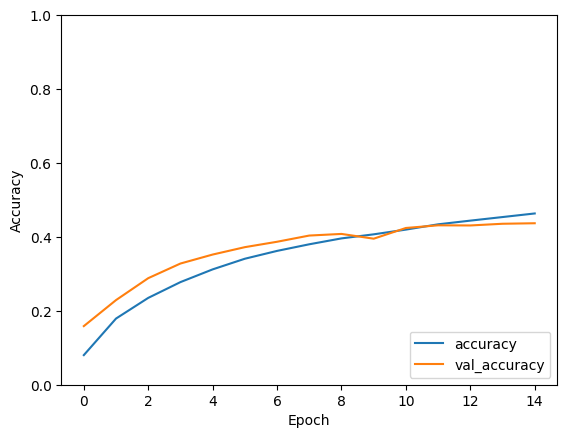

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 4, 4, 128)        

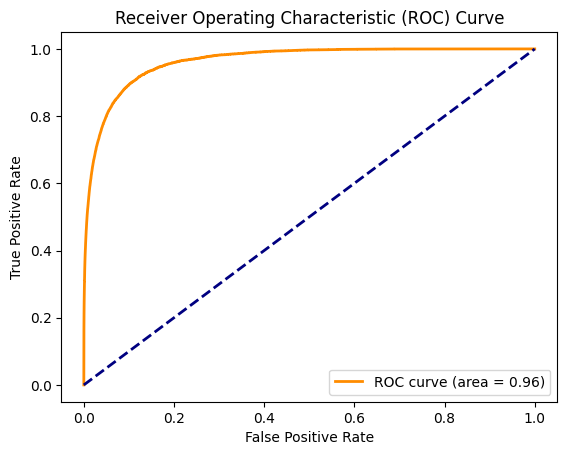

313/313 [==============================] - 1s 2ms/step
Confusion Matrix:
[[67  3  0 ...  0  0  0]
 [ 0 60  0 ...  0  0  1]
 [ 0  0 29 ...  0  9  1]
 ...
 [ 0  0  0 ... 39  0  0]
 [ 0  1  6 ...  0 24  0]
 [ 0  1  0 ...  0  0 50]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.67      0.74       100
           1       0.47      0.60      0.52       100
           2       0.35      0.29      0.32       100
           3       0.39      0.17      0.24       100
           4       0.24      0.16      0.19       100
           5       0.42      0.33      0.37       100
           6       0.48      0.49      0.48       100
           7       0.57      0.37      0.45       100
           8       0.35      0.63      0.45       100
           9       0.49      0.55      0.52       100
          10       0.30      0.39      0.34       100
          11       0.46      0.18      0.26       100
          12       0.71      0.46      0.56 

In [8]:
def load_cifar100():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='fine')
    x_train, x_test = x_train / 255.0, x_test / 255.0
    num_classes = 100
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)
    return x_train, y_train, x_test, y_test

def create_cnn_model(input_shape, num_classes):
    model = tf.keras.models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), padding='same', activation='tanh', input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    # model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    # model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    # model.add(layers.Dropout(0.25))

    model.add(layers.GlobalAveragePooling2D())

    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(num_classes, activation='softmax'))

    opt = tf.keras.optimizers.Adam(0.001)
    model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    logdir = os.path.join("logs", datetime.now().strftime("%Y%m%d-%H%M%S"))
    tensorboard_callback = TensorBoard(logdir, histogram_freq=1)

    return model, tensorboard_callback

def train_model(model, x_train, y_train, x_val, y_val, epochs, tensorboard_callback):
    history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_val, y_val), callbacks=[tensorboard_callback])
    # model.save_weights("model_weights.h5")
    return history

def evaluate_model(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    print(f'\nTest accuracy: {test_acc}')
    return test_acc

def plot_training_history(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.show()

def plot_model_architecture(model):
    model.summary()
    plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

def plot_roc_curve(model, x_test, y_test):
    y_pred = model.predict(x_test)
    fpr, tpr, thresholds = roc_curve(y_test.ravel(), y_pred.ravel())
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

def display_confusion_matrix_and_report(model, x_test, y_test):
    y_pred_probabilities = model.predict(x_test)
    y_pred_class = y_pred_probabilities.argmax(axis=1)
    y_true_class = y_test.argmax(axis=1)

    conf_matrix = confusion_matrix(y_true_class, y_pred_class)
    class_report = classification_report(y_true_class, y_pred_class)

    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)

def main():
    x_train, y_train, x_test, y_test = load_cifar100()
    input_shape = x_train.shape[1:]
    num_classes = 100

    model, tensorboard_callback = create_cnn_model(input_shape, num_classes)

    epochs = int(input("Enter the number of epochs: "))
    x_val, y_val = x_test, y_test  # Use test set for validation
    history = train_model(model, x_train, y_train, x_val, y_val, epochs, tensorboard_callback)

    evaluate_model(model, x_test, y_test)
    plot_training_history(history)
    plot_model_architecture(model)
    plot_roc_curve(model, x_test, y_test)
    display_confusion_matrix_and_report(model, x_test, y_test)

if __name__ == "__main__":
    main()